# Neural networks models: practicals

In this notebook you will practice simple neural networks models for classification.
We will be using the `breast cancer` dataset:

- binary classification problem: breast cancer diagnosis, `0`: `malignant`, `1`: `benign`
- EDA: look at the data
- split between the training and the test sets
- number of hidden layers
- number of nodes within layers
- type of activation functions in the hidden layers
- number of epochs
- number of features to include in the model
- etc.

Let's start by importing some basic libraries and the data:

In [1]:
## import libraries
import numpy as np
import tensorflow as tf
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
bcancer = load_breast_cancer()
y = bcancer.target
X = bcancer.data
y.shape

(569,)

In [3]:
from collections import Counter
print(Counter(y))

Counter({1: 357, 0: 212})


In [4]:
print(bcancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

It's now your turn to go on with the exercise:

1. explore the data
2. prepare the data (e.g. is any transformation needed?)
3. split the data into training and validation sets
4. define the neural network model
5. train the model
6. evaluate model performance

We propose to structure the exercise in blocks: we will evaulate together your progress after each block.

It's a good idea to reset the session (`Runtime` $\rightarrow$ `Restart runtime`) and reload the libraries: this way, you'll get a better feel of which are the necessary `Python` libraries to import.

# 1.EDA

## Conversion to pandas dataframe/serie

In [5]:
## write your own code here
bcancer = load_breast_cancer()

#converting to two handy pandas structures
features = pd.DataFrame(bcancer.data, columns=bcancer.feature_names)
target = pd.Series(bcancer.target)

In [6]:
#the names of the features are stored here
bcancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Taking a look a features

In [7]:
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
#summary statistics
features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Looking for redundant (higly correlated features)

In [9]:
corrmatrix = features.corr()
corrmatrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

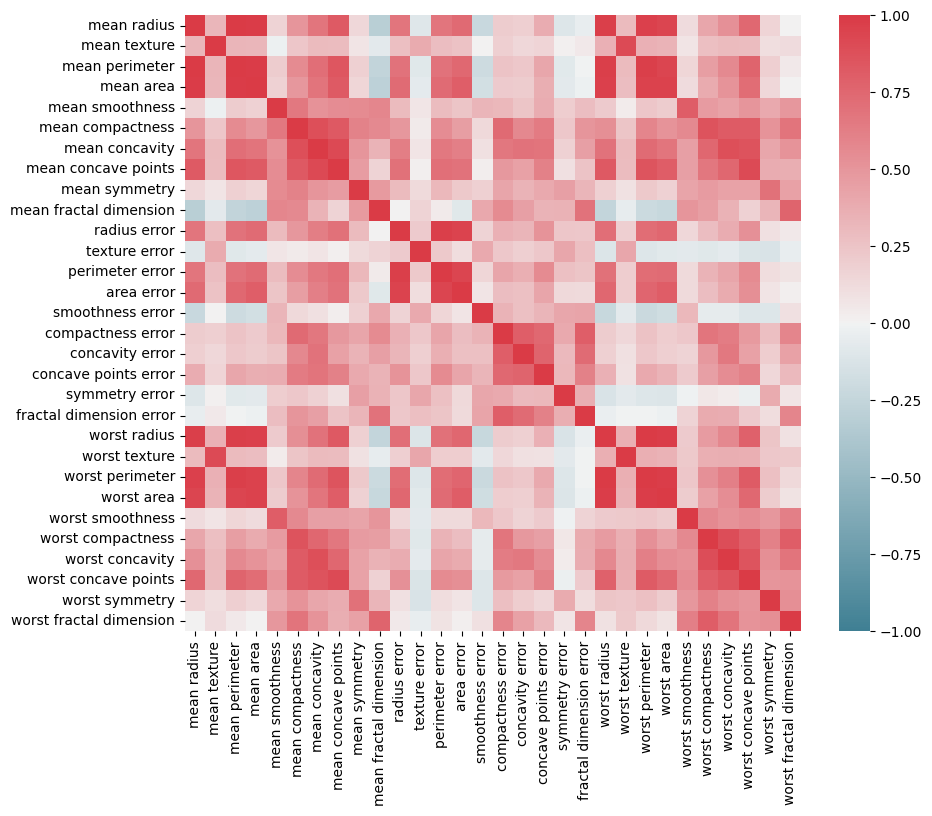

In [10]:
# a heatmap is probably easier to read

import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmatrix,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

## Taking a look at target

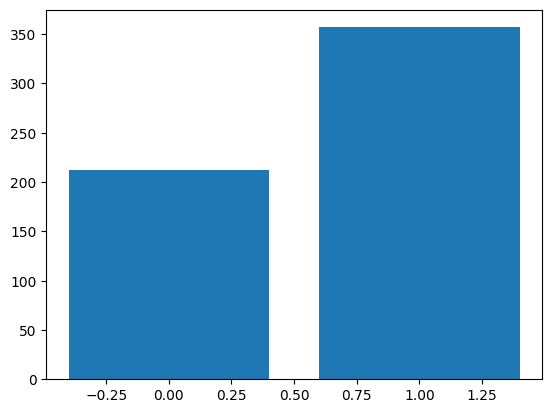

In [11]:
# Get unique values and their counts
values, counts = np.unique(target, return_counts=True)

# Create bar chart
plt.bar(values, counts)

# Show the plot
plt.show()

In [12]:
#since the target is coded as 0 (malignant) and 1 (benign) just taking the average gives us information on
#the occurrence frequency
print(target.mean())

0.6274165202108963


# 2.Data preprocessing

Should we transform the data in any way?

In [13]:
### your code here
#we apply a very basic normalization
avg = features.mean()
std = features.std()

features = (features - avg) /std

#let's check if features now have unitary standard deviation and null average
features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.159355e-15,-6.549730e-15,-6.993039e-16,-8.491548e-16,6.093934e-15,-1.111394e-15,-3.121893e-16,1.023981e-15,-1.848160e-15,-1.461046e-15,...,-2.285225e-15,1.735772e-15,-1.223782e-15,6.118909e-16,-5.082441e-15,-2.135374e-15,6.243785e-16,-1.998011e-16,-2.422589e-15,2.510002e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-1.260710e+00,-2.741705e+00,-1.818265e+00,...,-1.725382e+00,-2.222039e+00,-1.691872e+00,-1.221348e+00,-2.680337e+00,-1.442609e+00,-1.304683e+00,-1.743529e+00,-2.159060e+00,-1.600431e+00
25%,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.372951e-01,-7.026215e-01,-7.220040e-01,...,-6.743279e-01,-7.479711e-01,-6.889721e-01,-6.415713e-01,-6.906227e-01,-6.804845e-01,-7.558491e-01,-7.557349e-01,-6.412994e-01,-6.913035e-01
50%,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-3.973715e-01,-7.156354e-02,-1.781226e-01,...,-2.688030e-01,-4.347738e-02,-2.857288e-01,-3.408813e-01,-4.680159e-02,-2.692639e-01,-2.180402e-01,-2.232725e-01,-1.272975e-01,-2.162538e-01
75%,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01,5.255994e-01,6.463664e-01,5.303125e-01,4.705693e-01,...,5.215568e-01,6.577623e-01,5.398040e-01,3.572747e-01,5.970195e-01,5.391944e-01,5.306742e-01,7.118836e-01,4.497425e-01,4.503661e-01
max,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00,4.239858e+00,3.924477e+00,4.480808e+00,4.906602e+00,...,4.090590e+00,3.882489e+00,4.283568e+00,5.924959e+00,3.951897e+00,5.108382e+00,4.696536e+00,2.683516e+00,6.040726e+00,6.840837e+00


# 3.Train-validation split

In [14]:
## write your code here

from sklearn.model_selection import StratifiedShuffleSplit

#declaring a sss object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

#sss.split() returns two iterables over the two pieces of data
for train_index, val_index in sss.split(X=features, y=target):
  x_train = features.iloc[train_index, :]
  x_val   = features.iloc[val_index, :]

  y_train = target[train_index]
  y_val   = target[val_index]

In [15]:
#investigate if the split was correct
print("Training features size: ", x_train.shape)
print("Test features size: ", x_val.shape)
print("Training targets size: ", y_train.shape)
print("Test targets size: ", y_val.shape)
print("Fraction of samples used for training: ", (y_train.shape[0])/(y_train.shape[0] + y_val.shape[0]))


Training features size:  (455, 30)
Test features size:  (114, 30)
Training targets size:  (455,)
Test targets size:  (114,)
Fraction of samples used for training:  0.7996485061511424


In [16]:
#investigate if train and validation sets have the same proportion of
#cases and controls (i.e. we are actually doing stratified crossvalidation)
print("Proportion of controls in train set     : ", np.mean(y_train))
print("Proportion of controls in validation set: ", np.mean(y_val))

Proportion of controls in train set     :  0.6263736263736264
Proportion of controls in validation set:  0.631578947368421


# 4.Define your DL model

Choose your neural network architecture: build and compile the model

## Network configuration

In [17]:
# Configuration options
input_shape = (x_train.shape[1],) ## tuple that specifies the number of features
hidden_nodes = 16
hidden_activation = 'relu'
output_activation = 'sigmoid'
loss_function = 'binary_crossentropy'
optimizer_used = 'sgd' #stochastic gradient descent
num_epochs = 30

## Define and build the network

In [18]:
from keras.models import Sequential
from keras.layers import Dense # a "dense" layer is a layer were all the data coming in are connected to all nodes

# binary classification shallow neural network model in Keras
model = Sequential()
model.add(Dense(units=hidden_nodes, input_shape=input_shape, activation=hidden_activation))
model.add(Dense(1, activation=output_activation))

#the model is declared, but we still need to compile it to actually
#build all the data structures
model.compile(optimizer=optimizer_used, loss=loss_function)

#taking a look
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# 5.Train the model

In [19]:
history = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_val, y_val), verbose=0)

## Checking the performances

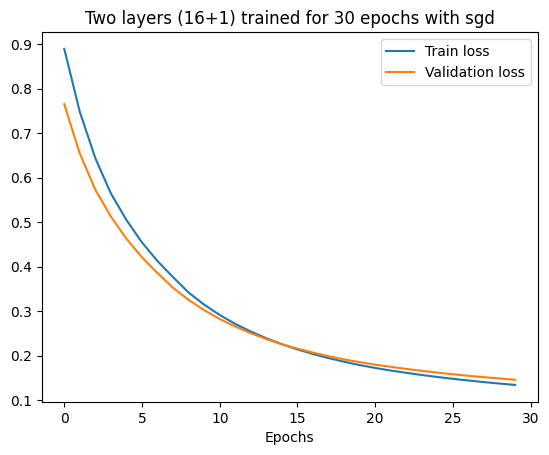

In [20]:
def plot_loss_history(h, title):
    plt.plot(h.history['loss'], label = "Train loss")
    plt.plot(h.history['val_loss'], label = "Validation loss")
    plt.xlabel('Epochs')
    plt.title(title)
    plt.legend()
    plt.show()

mytitle = 'Two layers ({}+1)'.format(hidden_nodes) +\
  ' trained for {} epochs'.format(num_epochs) +\
  ' with ' + optimizer_used
plot_loss_history(history, mytitle)

# 6.Evaluate model performance

How accurate is your model?

In [21]:
## your code here

from sklearn.metrics import confusion_matrix

predictions = model.predict(x_val)
predicted_labels = np.where(predictions > 0.5, "benign", "malignant")
target_labels = np.where(y_val > 0.5, "benign", "malignant")

con_mat_df = confusion_matrix(target_labels, predicted_labels, labels=["malignant","benign"])
print(con_mat_df)

4/4 [==============================] - 0s 16ms/step
[[37  5]
 [ 0 72]]


# [EXTRA] What if we didn't normalize?

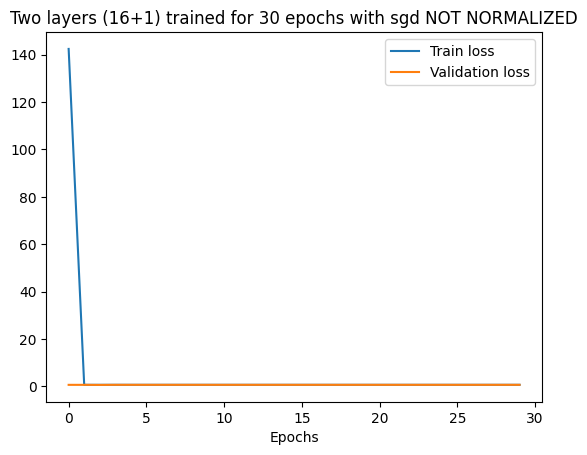

In [22]:
#restart from fresh
features_not_normalized = pd.DataFrame(bcancer.data, columns=bcancer.feature_names)

#we still have the train_index/val_index from the previous split
x_train_not_normalized = features_not_normalized.iloc[train_index, :]
x_val_not_normalized   = features_not_normalized.iloc[val_index, :]

#let's just reset the declared model
#see: https://keras.io/api/utils/backend_utils/
tf.keras.backend.clear_session()

#training the model
history = model.fit(x_train_not_normalized, y_train, epochs=num_epochs, validation_data=(x_val_not_normalized, y_val), verbose=0)

#plot the loss history
mytitle = 'Two layers ({}+1)'.format(hidden_nodes) +\
  ' trained for {} epochs'.format(num_epochs) +\
  ' with ' + optimizer_used +\
  ' NOT NORMALIZED'
plot_loss_history(history, mytitle)

Let's take a look at the confusion matrix. Do you see anything wrong?

In [23]:
predictions = model.predict(x_val_not_normalized)
predicted_labels = np.where(predictions > 0.5, "benign", "malignant")
target_labels = np.where(y_val > 0.5, "benign", "malignant")

con_mat_df = confusion_matrix(target_labels, predicted_labels, labels=["malignant","benign"])
print(con_mat_df)

4/4 [==============================] - 0s 3ms/step
[[ 0 42]
 [ 0 72]]


# [EXTRA] Overfitting

We test a network that is bigger than what is actually required

In [24]:
# new configuration options
hidden_nodes_1 = 32
hidden_nodes_2 = 16
num_epochs_long = 100
optimizer_used = 'rmsprop'

# binary classification shallow neural network model in Keras
model = Sequential()
model.add(Dense(units=hidden_nodes_1, input_shape=input_shape, activation=hidden_activation))
model.add(Dense(units=hidden_nodes_2, activation=hidden_activation))
model.add(Dense(1, activation=output_activation))

from here on is the usual stuff:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


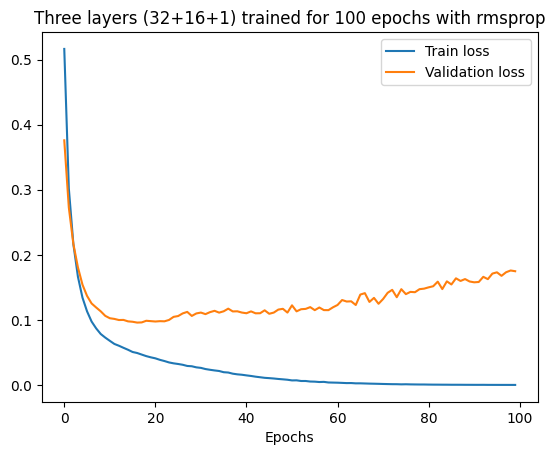

In [25]:
#compile
model.compile(optimizer=optimizer_used, loss=loss_function)

#taking a look
print(model.summary())

#train
history = model.fit(x_train, y_train, epochs=num_epochs_long, validation_data=(x_val, y_val), verbose=0)

#plot the loss history
mytitle = 'Three layers ({}'.format(hidden_nodes_1) +\
  '+{}+1)'.format(hidden_nodes_2) +\
  ' trained for {} epochs'.format(num_epochs_long) +\
  ' with ' + optimizer_used
plot_loss_history(history, mytitle)